<a href="https://colab.research.google.com/github/sara16umar-sys/Data-analysics-Project/blob/main/Data_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import pandas as pd
import numpy as np

In [ ]:
path = kagglehub.dataset_download("lava18/google-play-store-apps")
print("Path to dataset files:",path)

Using Colab cache for faster access to the 'google-play-store-apps' dataset.
Path to dataset files: /kaggle/input/google-play-store-apps


In [ ]:
data=pd.read_csv(path+'/googleplaystore.csv')
print("Dataset Loaded Properly.")

Dataset Loaded Properly.


In [ ]:
print("Shape:",data.shape)

Shape: (10841, 13)


In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
print("unique categ:",data['Category'].nunique())
print("Sample categ:",data['Category'].unique()[:10])

unique categ: 34
Sample categ: ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT']


In [ ]:
print("Duplicate rows:",data.duplicated().sum())

Duplicate rows: 483


In [ ]:
data.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [ ]:
data['Rating'].fillna(data['Rating'].mean(),inplace=True)

/tmp/ipython-input-4048454680.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Rating'].fillna(data['Rating'].mean(),inplace=True)


In [ ]:
data.drop_duplicates(inplace=True)
print("Duplicate Rows removed,new shape is:",data.shape)

Duplicate Rows removed,new shape is: (10358, 13)


In [ ]:
data['Price']=data['Price'].astype(str).str.strip()
data['Installs']=data['Installs'].astype(str).str.strip()
data['Reviews']=data['Reviews'].astype(str).str.strip()


data['Price']=data['Price'].str.replace('$',"",regex=False)
data['Price']=pd.to_numeric(data['Price'],errors='coerce')

data['Installs']=data['Installs'].str.replace('+',"",regex=False)
data['Installs']=data['Installs'].str.replace('+',"",regex=False)
data['Installs']=pd.to_numeric(data['Installs'],errors='coerce')

data['Reviews']=pd.to_numeric(data['Reviews'],errors='coerce')

data.dropna(subset=['Price','Installs','Reviews'],inplace=True)

print("Data Type Cleaning Done")
data[['App','Price','Installs','Reviews']].head()


Data Type Cleaning Done


,App,Price,Installs,Reviews
478,Truth or Dare Pro,1.49,50.0,0.0
479,"Private Dating, Hide App- Blue for PrivacyHider",2.99,100.0,0.0
480,Ad Blocker for SayHi,3.99,100.0,4.0
481,AMBW Dating App: Asian Men Black Women Interra...,7.99,100.0,2.0
605,Cardi B Live Stream Video Chat - Prank,0.00,500.0,28.0


In [ ]:
data.describe()

,Rating,Reviews,Installs,Price
count,1791.000000,1791.000000,1791.000000,1791.000000
mean,4.247586,4.948074,139.322725,1.645985
std,0.520918,10.206531,175.107047,17.875714
min,1.000000,0.000000,0.000000,0.000000
25%,4.193338,0.000000,10.000000,0.000000
50%,4.193338,2.000000,100.000000,0.000000
75%,4.200000,5.000000,100.000000,0.000000
max,5.000000,156.000000,500.000000,399.990000


from matplotlib import pyplot as plt
_df_0['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Reviews'].plot(kind='hist', bins=20, title='Reviews')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Installs'].plot(kind='hist', bins=20, title='Installs')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Rating', y='Reviews', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Reviews', y='Installs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Installs', y='Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Reviews'].plot(kind='line', figsize=(8, 4), title='Reviews')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Installs'].plot(kind='line', figsize=(8, 4), title='Installs')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
data=data[data['Rating']<=5]

In [ ]:
data['isPaid']=data['Type'].apply(lambda x:1 if x=='Paid' else 0)
data[['App','Type','isPaid']].head()

,App,Type,isPaid
478,Truth or Dare Pro,Paid,1
479,"Private Dating, Hide App- Blue for PrivacyHider",Paid,1
480,Ad Blocker for SayHi,Paid,1
481,AMBW Dating App: Asian Men Black Women Interra...,Paid,1
605,Cardi B Live Stream Video Chat - Prank,Free,0


In [ ]:
data.to_csv('cleaned_playstore.csv',index=False)
print("Cleaned Dataset Saved as cleaned_playstore.csv")

Cleaned Dataset Saved as cleaned_playstore.csv


DAY 02

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('cleaned_playstore.csv')

In [ ]:
sns.set(style="whitegrid")
print("shape:",data.shape)

shape: (1791, 14)


In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,isPaid
0,Truth or Dare Pro,DATING,4.193338,0.0,20M,50.0,Paid,1.49,Teen,Dating,"September 1, 2017",1.0,4.0 and up,1
1,"Private Dating, Hide App- Blue for PrivacyHider",DATING,4.193338,0.0,18k,100.0,Paid,2.99,Everyone,Dating,"July 25, 2017",1.0.1,4.0 and up,1
2,Ad Blocker for SayHi,DATING,4.193338,4.0,1.2M,100.0,Paid,3.99,Teen,Dating,"August 2, 2018",1.2,4.0.3 and up,1
3,AMBW Dating App: Asian Men Black Women Interra...,DATING,3.500000,2.0,17M,100.0,Paid,7.99,Mature 17+,Dating,"January 21, 2017",1.0.1,4.0 and up,1
4,Cardi B Live Stream Video Chat - Prank,DATING,4.400000,28.0,3.4M,500.0,Free,0.00,Everyone,Dating,"July 16, 2018",2.5,4.0.3 and up,0


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1791 entries, 0 to 1790
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1791 non-null   object 
 1   Category        1791 non-null   object 
 2   Rating          1791 non-null   float64
 3   Reviews         1791 non-null   float64
 4   Size            1791 non-null   object 
 5   Installs        1791 non-null   float64
 6   Type            1790 non-null   object 
 7   Price           1791 non-null   float64
 8   Content Rating  1791 non-null   object 
 9   Genres          1791 non-null   object 
 10  Last Updated    1791 non-null   object 
 11  Current Ver     1789 non-null   object 
 12  Android Ver     1791 non-null   object 
 13  isPaid          1791 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memory usage: 196.0+ KB
None


In [ ]:
print("\n Missing Values:\n",data.isnull().sum())


 Missing Values:
 App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       2
Android Ver       0
isPaid            0
dtype: int64


In [ ]:
data.describe()

,Rating,Reviews,Installs,Price,isPaid
count,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000
mean,4.247586,4.948074,139.322725,1.645985,0.156896
std,0.520918,10.206531,175.107047,17.875714,0.363804
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.193338,0.000000,10.000000,0.000000,0.000000
50%,4.193338,2.000000,100.000000,0.000000,0.000000
75%,4.200000,5.000000,100.000000,0.000000,0.000000
max,5.000000,156.000000,500.000000,399.990000,1.000000


Top 10 categories:
 Category
FAMILY             301
BUSINESS           190
MEDICAL            147
TOOLS              144
PERSONALIZATION    102
PRODUCTIVITY        94
LIFESTYLE           93
GAME                72
SPORTS              72
COMMUNICATION       71
Name: count, dtype: int64


/tmp/ipython-input-2273587476.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values,y=top_categories.index,palette='viridis')


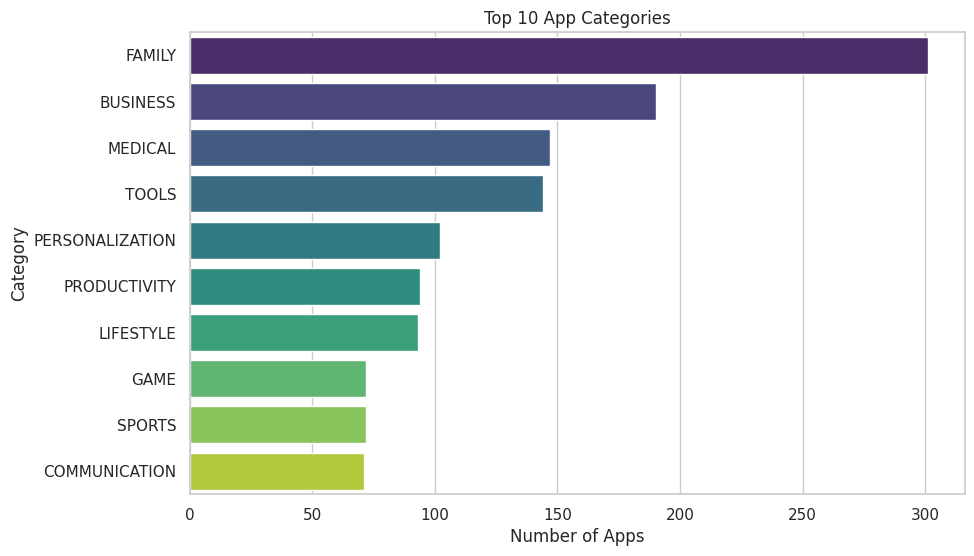

In [ ]:
top_categories=data['Category'].value_counts().head(10)
print("Top 10 categories:\n",top_categories)

plt.figure(figsize=(10,6))
sns.barplot(x=top_categories.values,y=top_categories.index,palette='viridis')
plt.title("Top 10 App Categories")
plt.xlabel("Number of Apps")
plt.ylabel('Category')
plt.show()

Average Rating by Category:
 Category
ART_AND_DESIGN        4.596669
EVENTS                4.413058
GAME                  4.364540
SHOPPING              4.362892
SOCIAL                4.361792
HEALTH_AND_FITNESS    4.353892
FOOD_AND_DRINK        4.322596
NEWS_AND_MAGAZINES    4.315786
LIFESTYLE             4.310828
TRAVEL_AND_LOCAL      4.298226
Name: Rating, dtype: float64


/tmp/ipython-input-384183620.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.values,y=avg_rating.index,palette='viridis')


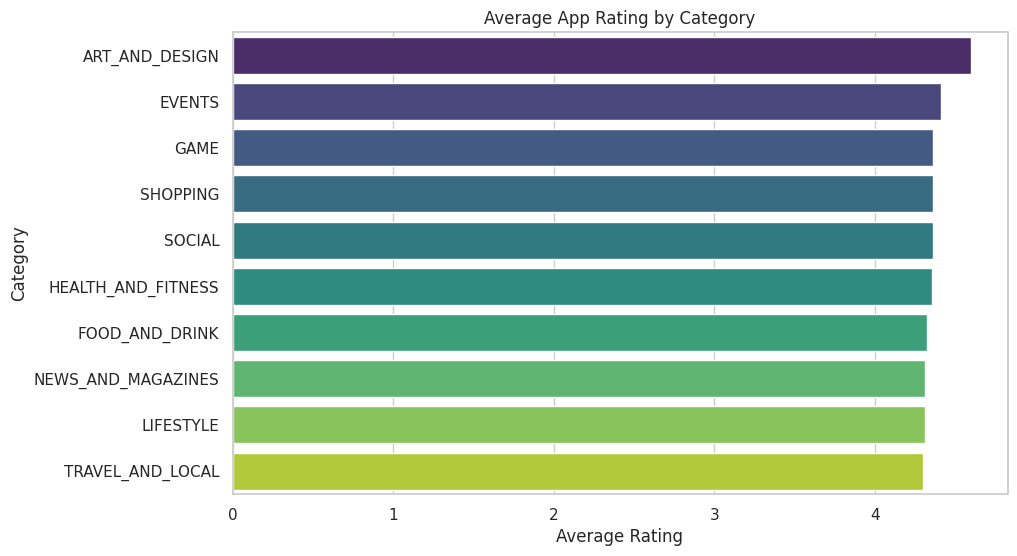

In [ ]:
avg_rating=data.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
print("Average Rating by Category:\n",avg_rating)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_rating.values,y=avg_rating.index,palette='viridis')
plt.title("Average App Rating by Category")
plt.xlabel("Average Rating")
plt.ylabel('Category')
plt.show()


App Types:
 Type
Free    1509
Paid     281
Name: count, dtype: int64


/tmp/ipython-input-949041495.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=app_types.values,y=app_types.index,palette='coolwarm')


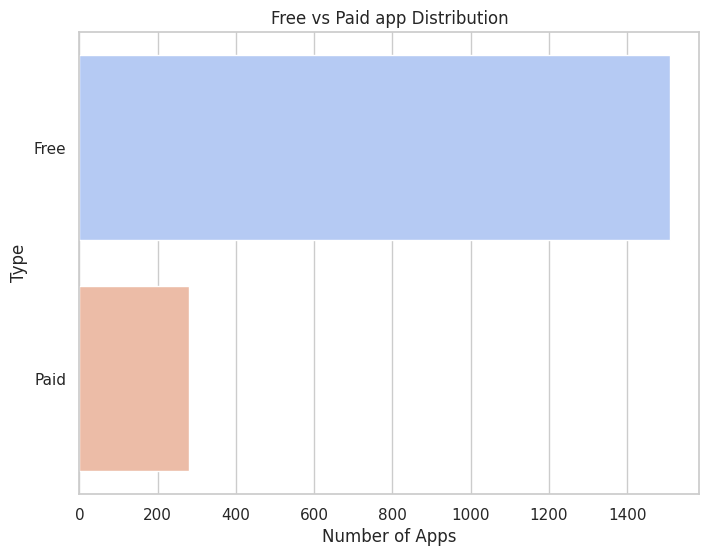

In [ ]:
app_types=data['Type'].value_counts()
print("App Types:\n",app_types)
plt.figure(figsize=(8,6))
sns.barplot(x=app_types.values,y=app_types.index,palette='coolwarm')
plt.title('Free vs Paid app Distribution')
plt.xlabel('Number of Apps')
plt.ylabel('Type')
plt.show()

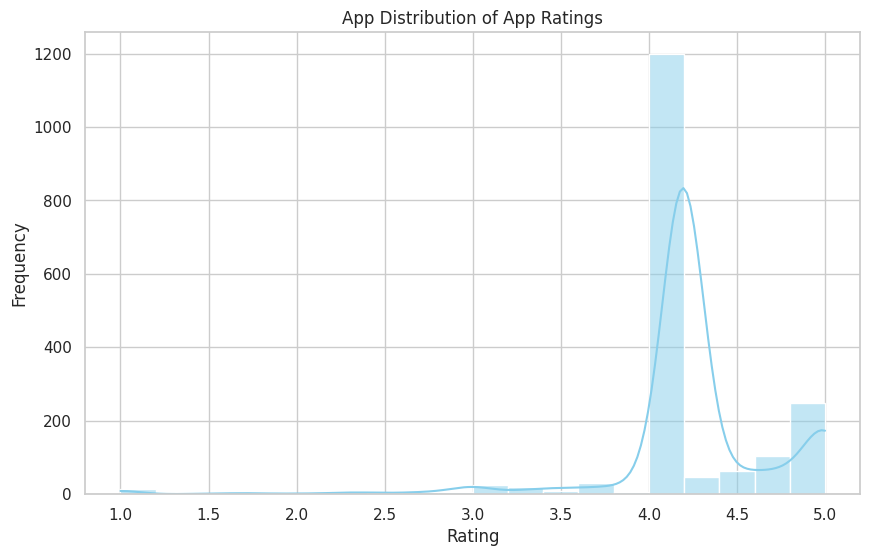

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['Rating'],bins=20,kde=True,color='skyblue')
plt.title('App Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

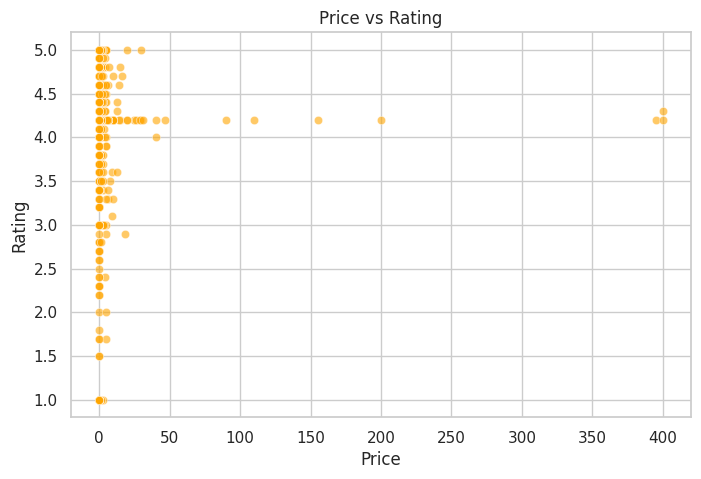

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Price',y='Rating',data=data,alpha=0.6,color='orange')
plt.title('Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

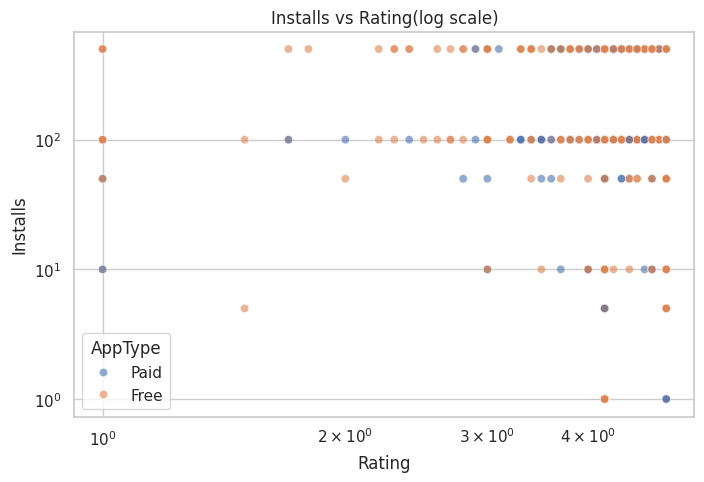

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(y='Installs',x='Rating',data=data,alpha=0.6,color='green',hue='Type')
plt.xscale('log')
plt.yscale('log')
plt.title('Installs vs Rating(log scale)')
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.legend(title='AppType')
plt.show()


Correlation Matrix:
             Rating   Reviews  Installs     Price    isPaid
Rating    1.000000  0.116368 -0.054870 -0.007810 -0.030474
Reviews   0.116368  1.000000  0.373396 -0.009846  0.152649
Installs -0.054870  0.373396  1.000000 -0.045142 -0.063743
Price    -0.007810 -0.009846 -0.045142  1.000000  0.213510
isPaid   -0.030474  0.152649 -0.063743  0.213510  1.000000


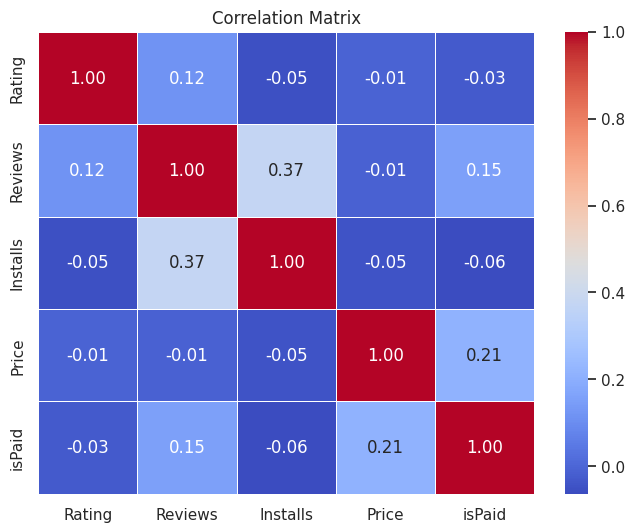

In [ ]:
corr=data[['Rating','Reviews','Installs','Price','isPaid']].corr()
print("Correlation Matrix:\n",corr)

plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=0.5,fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
data.describe().to_csv('eda_summary.csv')
print("EDA Summary Saved as eda_summary.csv")

EDA Summary Saved as eda_summary.csv
